In [1]:
%cd /home/aditya/git/columbia_robotics/hw2

/home/aditya/git/columbia_robotics/hw2


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

import image
from dataset import RGBDataset
from model import MiniUNet
from segmentation_helper import check_dataset, check_dataloader, show_mask

In [3]:
from segmentation import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cpu


In [5]:
# Define directories
root_dir = './dataset/'
train_dir = root_dir + 'train/'
val_dir = root_dir + 'val/'
test_dir = root_dir + 'test/'


In [6]:
# TODO: Create Datasets. You can use check_dataset(your_dataset) to check your implementation.
train_dataset = RGBDataset(train_dir, True)
val_dataset = RGBDataset(val_dir, True)
test_dataset = RGBDataset(test_dir, False)

# TODO: Prepare Dataloaders. Only shuffle the training set. You can use check_dataloader(your_dataloader) to check your implementation.
train_loader = DataLoader(train_dataset, batch_size=4,
                          shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4,
                        shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=4,
                         shuffle=False, num_workers=0)


In [7]:
train_dataset[0]['target'].shape

./dataset/train/gt/0_gt.png
5
tensor(0)


torch.Size([240, 320])

In [10]:
from segmentation_helper import *

dataset size: 300
./dataset/train/gt/41_gt.png
5
tensor(0)
input shape: (3, 240, 320)


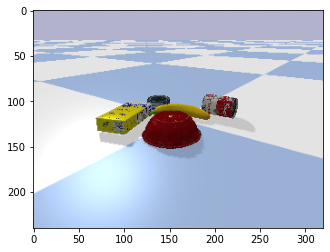

target shape: (240, 320)


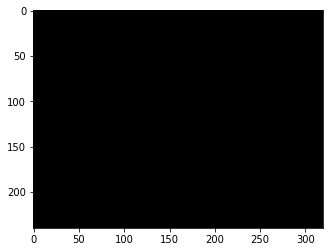

In [11]:
check_dataset(train_dataset)

In [12]:
from image import *

In [13]:
read_mask("./dataset/train/gt/98_gt.png").max()

5

In [21]:
gt_mask = read_mask("./dataset/train/gt/98_gt.png")

In [22]:
print(gt_mask.max())

5


In [23]:
import os
import re
import torch
from torch.utils.data import Dataset
from torchvision import transforms

import image

In [24]:
transform_gt = transforms.Compose([
            transforms.ToTensor()
        ])


In [25]:
transform_gt(gt_mask).max()

tensor(0.0196)

In [26]:
gt_mask.shape

(240, 320)

In [35]:
torch.LongTensor(gt_mask).max()

tensor(5)

In [ ]:
show_mask(read_mask("./dataset/train/gt/98_gt.png"))

In [ ]:
train_dataset[0]['target'].max()

In [ ]:
%debug

In [ ]:
# TODO: Prepare model
model = MiniUNet()

# TODO: Define criterion and optimizer
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
train_loss_list, train_miou_list, val_loss_list, val_miou_list = list(), list(), list(), list()
epoch, max_epochs = 1, 50  # TODO: you may want to make changes here
best_miou = float('-inf')

In [ ]:
while epoch <= max_epochs:
    print('Epoch (', epoch, '/', max_epochs, ')')
    train_loss, train_miou = train(model, device, train_loader, criterion, optimizer)
    val_loss, val_miou = val(model, device, val_loader, criterion)
    train_loss_list.append(train_loss)
    train_miou_list.append(train_miou)
    val_loss_list.append(val_loss)
    val_miou_list.append(val_miou)
    print('Train loss & mIoU: %0.2f %0.2f' % (train_loss, train_miou))
    print('Validation loss & mIoU: %0.2f %0.2f' % (val_loss, val_miou))
    print('---------------------------------')
    if val_miou > best_miou:
        best_miou = val_miou
        save_chkpt(model, epoch, val_miou)
    epoch += 1


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
nn.MaxPool2d(2, 2).parameters()